In [1]:
!pip install kaggle

     |████████████████████████████████| 61kB 664kB/s eta 0:00:01
     |████████████████████████████████| 81kB 2.7MB/s eta 0:00:011
  Created wheel for kaggle: filename=kaggle-1.5.6-cp37-none-any.whl size=72859 sha256=5f5902d00f52bfa26fc15ef3521f64b1e1fe119d9644f1142cb1cae87b0955b1
  Stored in directory: /home/bigdata/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
  Created wheel for python-slugify: filename=python_slugify-4.0.0-py2.py3-none-any.whl size=5487 sha256=a489c3c9e5fe33c9c4eab73f99639dbae1ae3064b59bcb4a8344f231be79ea08
  Stored in directory: /home/bigdata/.cache/pip/wheels/11/94/81/312969455540cb0e6a773e5d68a73c14128bfdfd4a7969bb4f
Successfully built kaggle python-slugify


In [1]:
import kaggle

kaggle.api.authenticate()

In [2]:
# List datasets available in kaggle
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
kimjihoo/coronavirusdataset                                 Coronavirus-Dataset                                  32KB  2020-03-13 13:48:11          12687        566  1.0              
sudalairajkumar/novel-corona-virus-2019-dataset             Novel Corona Virus 2019 Dataset                     348KB  2020-03-12 10:57:12          40271       1796  0.9705882        
rupals/gpu-runtime                                          Segmentation on GPU Kernel Performance Dataset        4MB  2020-03-01 10:04:27            167         12  0.8235294        
paultimothymooney/coronavirus-genome-sequence               Coronavirus Genome S

In [2]:
# Download the COVIDdataset and save files in 'covid_data/' (GOLD)
!rm -rf covid_data 
!kaggle datasets download sudalairajkumar/novel-corona-virus-2019-dataset 
!unzip novel-corona-virus-2019-dataset.zip -d covid_data 
!rm -rf novel-corona-virus-2019-dataset.zip 

date_field = 'ObservationDate'
country_field = 'Country/Region'

  0%|                                                | 0.00/348k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 348k/348k [00:00<00:00, 4.75MB/s]
Archive:  novel-corona-virus-2019-dataset.zip
  inflating: covid_data/COVID19_line_list_data.csv  
  inflating: covid_data/COVID19_open_line_list.csv  
  inflating: covid_data/covid_19_data.csv  
  inflating: covid_data/time_series_covid_19_confirmed.csv  
  inflating: covid_data/time_series_covid_19_deaths.csv  
  inflating: covid_data/time_series_covid_19_recovered.csv  


In [7]:
# Download the COVIDdataset and save files in 'covid_data/' (SILVER)
!rm -rf covid_data 
!kaggle datasets download -d imdevskp/corona-virus-report
!unzip corona-virus-report.zip -d covid_data 
!rm -rf corona-virus-report.zip 
!mv covid_data/covid_19_clean_complete.csv covid_data/covid_19_data.csv

date_field = 'Date'
country_field = 'Country/Region'

  0%|                                               | 0.00/63.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 63.1k/63.1k [00:00<00:00, 1.66MB/s]
Archive:  corona-virus-report.zip
  inflating: covid_data/covid_19_clean_complete.csv  


In [4]:
# Download the COVIDdataset and save files in 'covid_data/' (LESS IMPORTANT)
!rm -rf covid_data 
!kaggle datasets download -d vignesh1694/covid19-coronavirus
!unzip covid19-coronavirus.zip -d covid_data 
!rm -rf covid19-coronavirus.zip 
!mv covid_data/2019_nCoV_data.csv covid_data/covid_19_data.csv

date_field = 'Date'
country_field = 'Country'

  0%|                                                | 0.00/240k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 240k/240k [00:00<00:00, 3.87MB/s]
Archive:  covid19-coronavirus.zip
  inflating: covid_data/2019_nCoV_data.csv  
  inflating: covid_data/time_series_19-covid-Confirmed.xlsx  
  inflating: covid_data/time_series_19-covid-Deaths.xlsx  
  inflating: covid_data/time_series_19-covid-Recovered.xlsx  


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib.pyplot import figure


# To return the RMS between different countries
def distance_between_countries(df_1, df_2):
    difference = df_1['Active'] - df_2['Active']
    difference_not_nan = difference[difference.isnull()==False] # These are the non NaN values
    if len(difference_not_nan)==0: # There are not values to compare to obtain RMS, so its useless
        score = 10*(10**20)
    elif len(difference_not_nan)>0:
        score = sum(abs(difference_not_nan))
        
    return score

# For obtaining the oprimal shifted plot
def optimal_shifted_df(df_italy, df_country, days_range):
    score_dictionary = {}
    if days_range!=0:
        for days_to_move in range(-days_range,days_range):
            df_country_shifted = df_country.shift(periods=days_to_move, freq=None, axis=0)
            score_dictionary[days_to_move] = distance_between_countries(df_italy, df_country_shifted)
        optimal_day = min(score_dictionary, key=score_dictionary.get)
    else:
        optimal_day = 0
    df_country_shifted = df_country.shift(periods=optimal_day, freq=None, axis=0)
    
    #print(score_dictionary)
    #print(optimal_day)
    
    return df_country_shifted, optimal_day


# Defining dataframe for specified country
def get_country_cases(country):
    df_total = pd.read_csv('covid_data/covid_19_data.csv')
    df_country = df_total[df_total[country_field]==country]
    df_country['Active'] = df_country['Confirmed'] - (df_country['Deaths'] + df_country['Recovered'])
    
    # Indexes must be the same when I want to compare different countries
    df_country['Datetime'] = pd.to_datetime(df_country[date_field])
    df_country = df_country.set_index('Datetime')
    
    return df_country

get_country_cases('Spain').tail(5) # Last 5 days

/home/bigdata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/bigdata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
Datetime,,,,,,,,,
2020-03-09,NaN,Spain,40.0,-4.0,3/9/20,1073,28,32,1013
2020-03-10,NaN,Spain,40.0,-4.0,3/10/20,1695,35,32,1628
2020-03-11,NaN,Spain,40.0,-4.0,3/11/20,2277,54,183,2040
2020-03-12,NaN,Spain,40.0,-4.0,3/12/20,2277,55,183,2039
2020-03-13,NaN,Spain,40.0,-4.0,3/13/20,5232,133,193,4906


/home/bigdata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/bigdata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


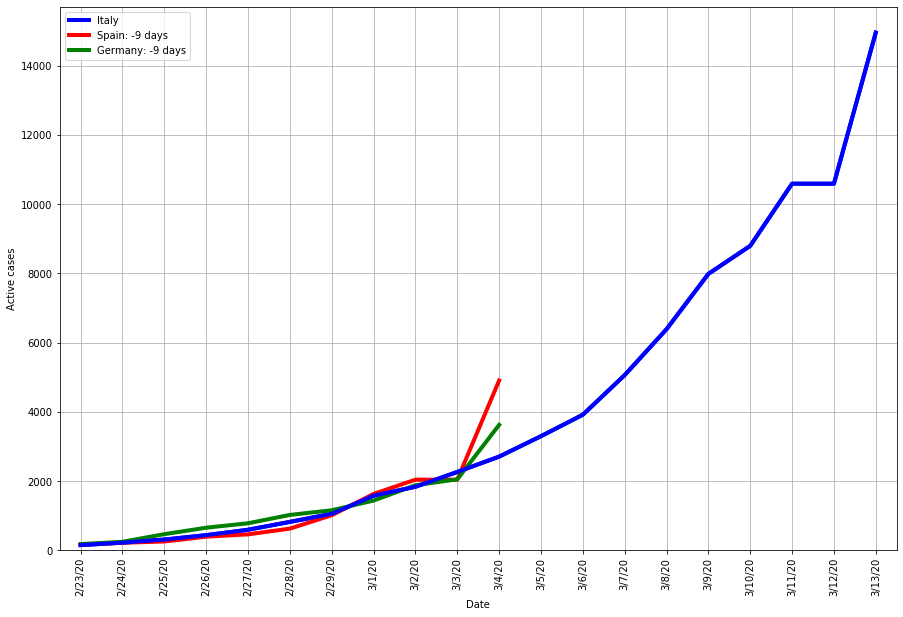

In [9]:
# Required imports 
import math
import numpy as np

# Country lists
df_list = []
last_days_to_show = 20
color_vector = ['blue','red','green']
country_names = ['Italy','Spain','Germany']
days_window_size = 20 # to define a range = [-20,20] in order to obtain RMS.
                      # '0' if I dont want to shift graphs

# Defining new cases 
for name in country_names:
    df_list.append(get_country_cases(name))

#df_country = get_country_cases('Spain')


# Define plot parameters
ax = plt.gca()

for i, df_country in enumerate(df_list):
    if i==0: # Italy     
        df_italy = df_country.copy()
        ax_0 = df_italy.tail(last_days_to_show).plot(kind='line', lw=4, color=color_vector[0], grid=True, figsize=(15,10), x=date_field, y='Active', ax=ax)   
    else:
        df_country_shifted, optimal_day = optimal_shifted_df(df_italy, df_country, days_window_size)
        globals()['ax_'+str(i)] = df_country_shifted.tail(last_days_to_show).plot(kind='line', lw=4, color=color_vector[i], grid=True, figsize=(15,10), x=date_field, y='Active', ax=ax)   
        country_names[i] += ': ' + str(optimal_day) + ' days'
        
        
    #globals()['ax_'+str(i)] = df_country.plot(kind='bar', alpha=0.3, legend=False, color=color_vector[i], grid=True, figsize=(15,10), x='ObservationDate', y='NewCases', ax=ax)
ax_0 = df_italy.tail(last_days_to_show).plot(kind='line', lw=4, color=color_vector[0], grid=True, figsize=(15,10), x=date_field, y='Active', ax=ax)   

#ax_1 = df_country.plot(kind='line', legend=True, lw=4, color='blue', grid=True, figsize=(15,10), x='ObservationDate', y='NewCases', ax=ax)   
#df_country_shifted = optimal_shifted_df(df_country, days_range)
#ax_2 = df_country_shifted.plot(kind='line', legend=True, lw=4, color='red', grid=True, figsize=(15,10), x='ObservationDate', y='NewCases', ax=ax)   


ax_0 = df_italy.tail(last_days_to_show).plot(kind='bar', alpha=0, legend=False, color='blue', grid=True, figsize=(15,10), x=date_field, y='Active', ax=ax)


ax.set_ylabel("Active cases")
ax.legend(country_names)
    
# Plot the data
plt.show()